# Checkpoint 1 - Clustering and Outlier Detection
You need to:
- represent the dataset in a vector space,
- perform exploratory data analysis (averages, distributions, ...) of the dataset after data cleaning and report the data cleaning step and the results of the analysis
- apply at least one clustering or outlier detection method,
- report at least one limitation that cannot be resolved with the current tools.
- compare the results using a simpler baseline or another method. (Compare with DBSCAN)

Only methods covered in Module 1 may be used.

## Dataset

Explain the dimensions we have:
- user_id
- checkin_time
- latitude
- longtiude
- location_id

## Exploratory Data Analysis

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

ModuleNotFoundError: No module named 'pandas'

In [ ]:
#Input data
df = pd.read_csv("C:\\Users\\Adrian\\Documents\\Aarhus University\\Data Mining\\Gowalla Data\\Gowalla_totalCheckins.txt", sep = "\t", header = None)
# read csv is still using local file path.
headers = ["user_id", "checkin_time", "latitude", "longitude", "location_id"]
df.columns = headers
print(df.head())

   user_id          checkin_time   latitude  longitude  location_id
0        0  2010-10-19T23:55:27Z  30.235909 -97.795140        22847
1        0  2010-10-18T22:17:43Z  30.269103 -97.749395       420315
2        0  2010-10-17T23:42:03Z  30.255731 -97.763386       316637
3        0  2010-10-17T19:26:05Z  30.263418 -97.757597        16516
4        0  2010-10-16T18:50:42Z  30.274292 -97.740523      5535878


### Data Cleaning Process

Text(0, 0.5, 'Latitude')

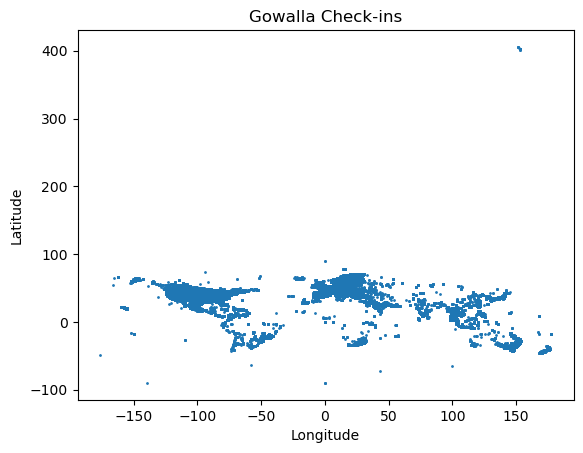

In [ ]:
plt.scatter(df["longitude"], df["latitude"], s=1)
plt.title("Gowalla Check-ins")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

explain that there are invalid data points, so they need to be cleaned

Text(0, 0.5, 'Latitude')

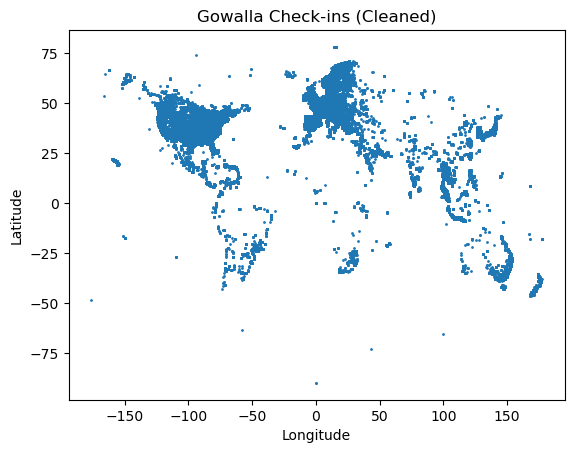

In [ ]:
#Removing outliers
df = df.drop(df[abs(df['latitude']) >= 90].index)
df = df.drop(df[abs(df['longitude']) >= 180].index)
plt.scatter(df["longitude"], df["latitude"], s=1)
plt.title("Gowalla Check-ins (Cleaned)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

In [ ]:
# Converting to a datetime datatype
df['checkin_time'] = pd.to_datetime(df['checkin_time'], errors='coerce')
print(df.dtypes)

user_id                       int64
checkin_time    datetime64[ns, UTC]
latitude                    float64
longitude                   float64
location_id                   int64
dtype: object


In [ ]:
#DO NOT RUN THIS CODE, STILL WORKING ON IT
import pygal
worldmap_chart = pygal.maps.world.World()
worldmap_chart.title = 'Gowalla Check-ins by Country'

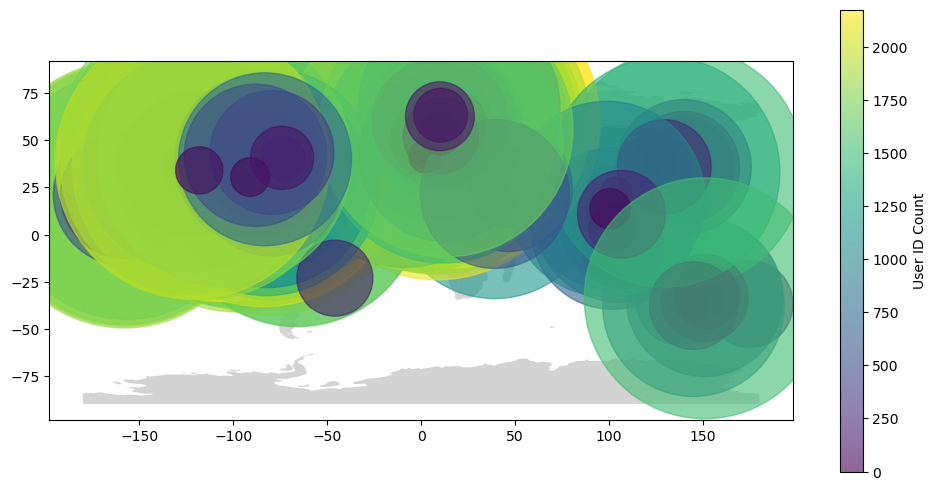

In [ ]:
#DO NOT RUN THIS CELL, IT IS NOT THE EXPECTED OUTPUT
import random

#Get world map data
world = gpd.read_file("C:\\Users\\Adrian\\Documents\\Aarhus University\\Data Mining\\ne_110m_admin_0_countries\\ne_110m_admin_0_countries.shp")

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(color="lightgrey", ax=ax)

random.seed(42)  # For reproducibility
randomlist = random.sample(range(0, len(df)), 1000)

x = df['longitude'].iloc[randomlist]
y = df['latitude'].iloc[randomlist]
z = df['user_id'].value_counts().loc[df['user_id'].iloc[randomlist]].values
plt.scatter(x, y, s=20*z, c=z, alpha=0.6, vmin=0)
plt.colorbar(label='User ID Count')


## Clustering / Outlier Detection Method

## Comparison

## Limitations